In [1]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import skimage as ski
from skimage import io
import time
import pylab as pl
%matplotlib inline
from IPython import display

 
def bresenhamLow(x0,y0,x1,y1):
    pikselX = []
    pikselY = []
    dx = x1 - x0
    dy = y1 - y0
    yi = 1
    if dy < 0:
        yi = -1
        dy = -dy
    D = 2*dy - dx
    y = y0

    for x in range(x0,x1+1):
        pikselX.append(x)
        pikselY.append(y)
        if D > 0:
            y = y + yi
            D = D - 2*dx
        D = D + 2*dy
    return pikselX,pikselY
    
def bresenhamHigh(x0,y0, x1,y1):
    pikselX = []
    pikselY = []
    dx = x1 - x0
    dy = y1 - y0
    xi = 1
    if dx < 0:
        xi = -1
        dx = -dx
    D = 2*dx - dy
    x = x0

    for y in range(y0,y1+1):
        pikselX.append(x)
        pikselY.append(y)
        if D > 0:
            x = x + xi
            D = D - 2*dy
        D = D + 2*dx
    return pikselX,pikselY
    

def bresenhamS(x0,y0, x1,y1):
    pikselX = []
    pikselY = []
    if abs(y1 - y0) < abs(x1 - x0):
        if x0 > x1:
            
            return bresenhamLow(x1, y1, x0, y0)
        else:
            return bresenhamLow(x0, y0, x1, y1)
    else:
        if y0 > y1:
            return bresenhamHigh(x1, y1, x0, y0)
        else:
            return bresenhamHigh(x0, y0, x1, y1) 
            

def wczytajObraz(nazwaPliku):
    image = io.imread(nazwaPliku)
    #image = rgb2gray(image)
    io.imshow(image)
    return image


#io.imshow(obraz)

#image = io.imread("tomograf-zdjecia/Kolo.jpg", as_gray=True)
#image = rescale(image, scale=0.4, mode='reflect', multichannel=False)

#plt.show()

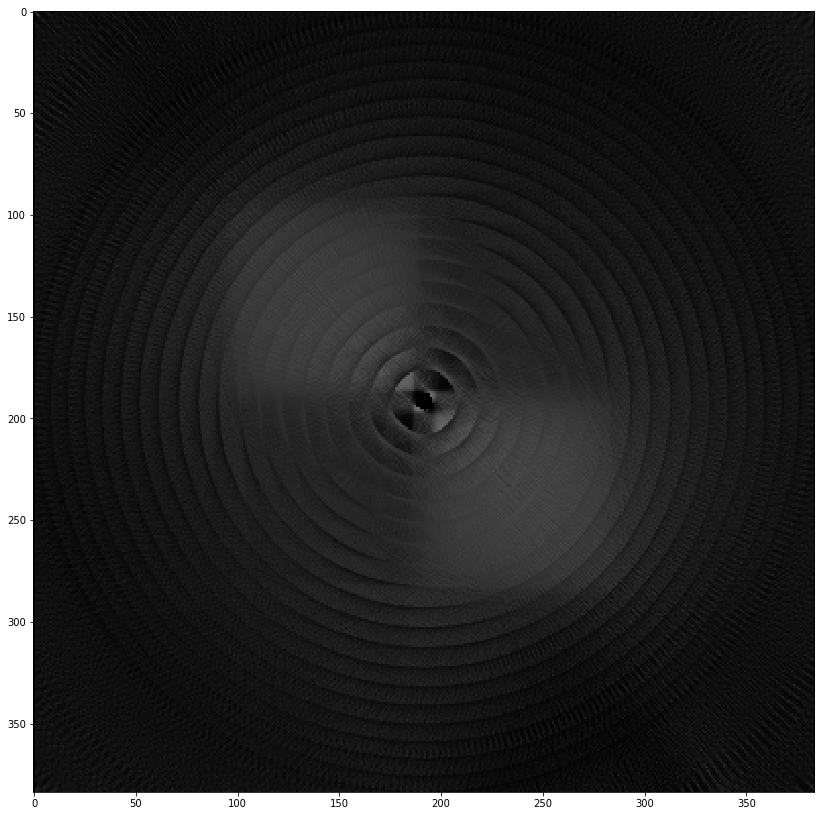

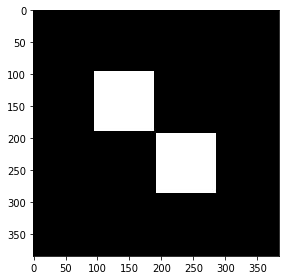

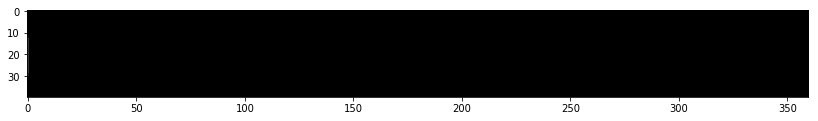

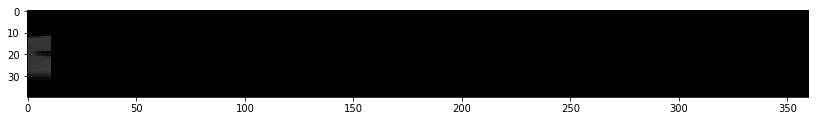

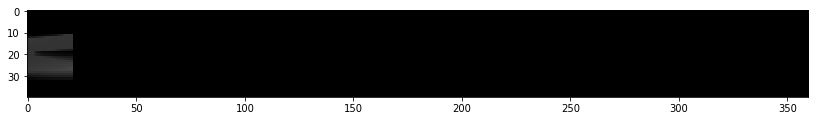

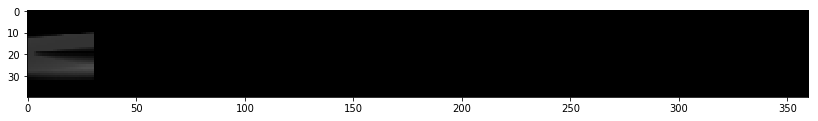

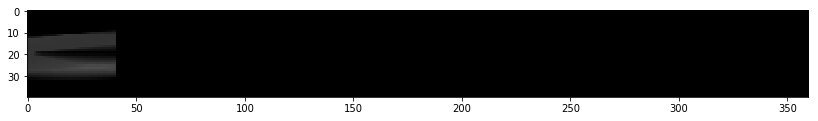

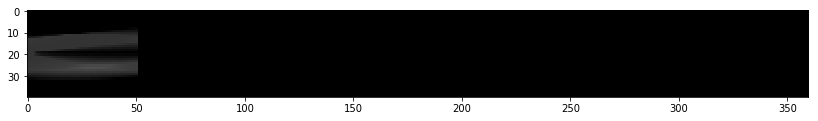

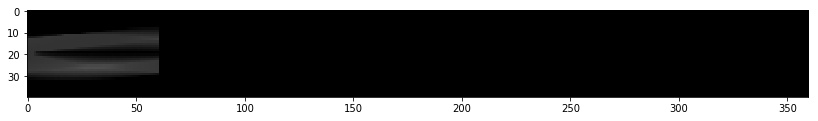

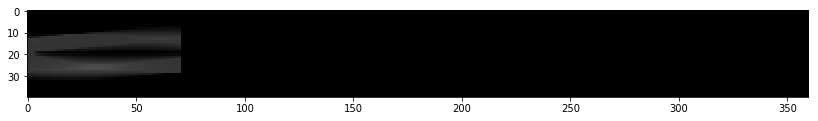

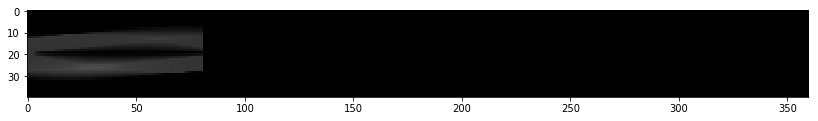

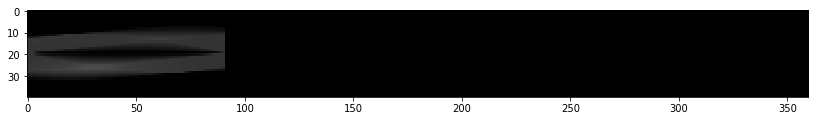

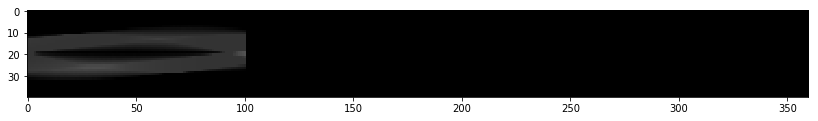

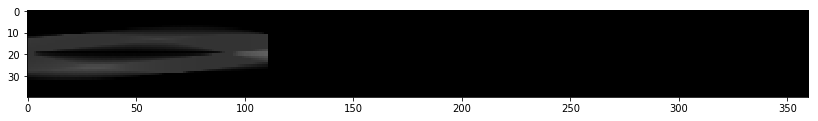

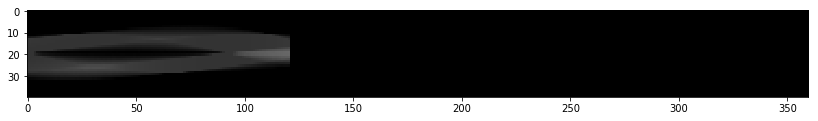

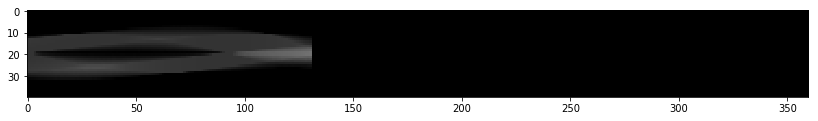

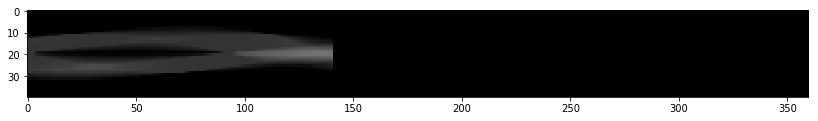

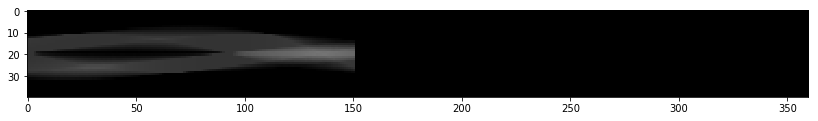

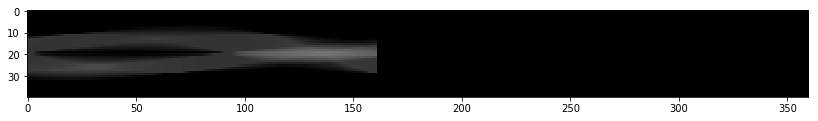

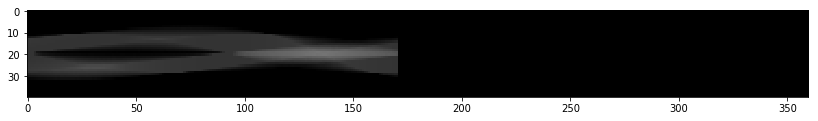

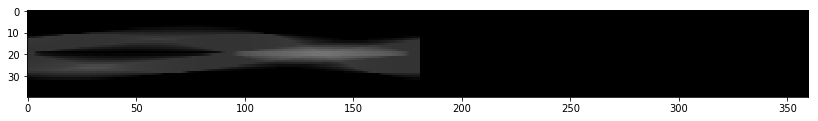

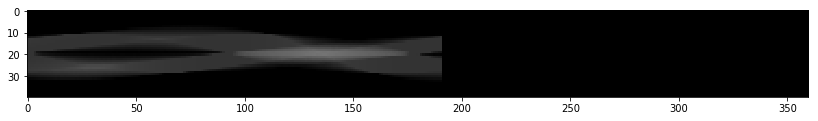

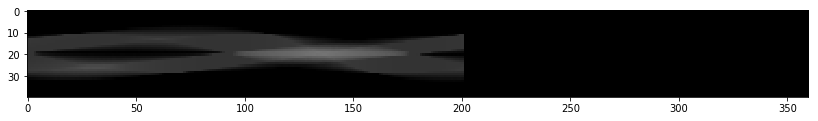

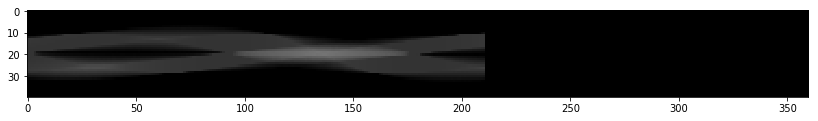

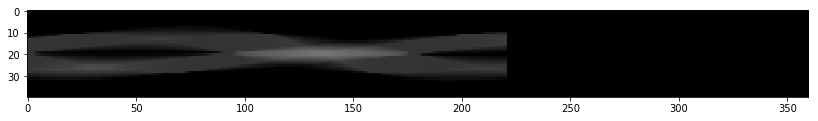

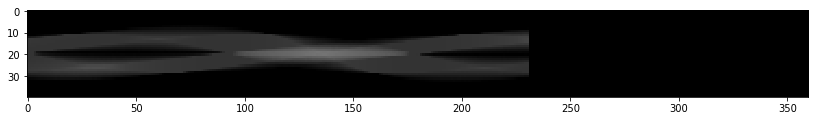

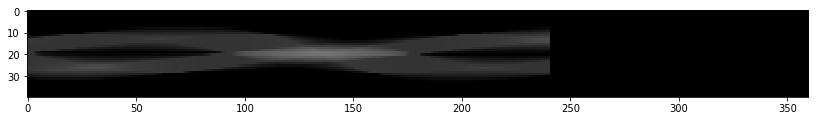

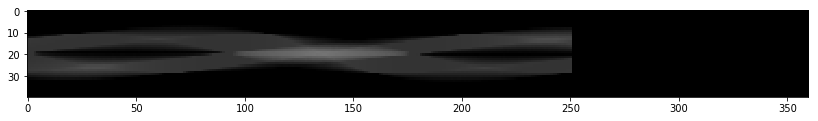

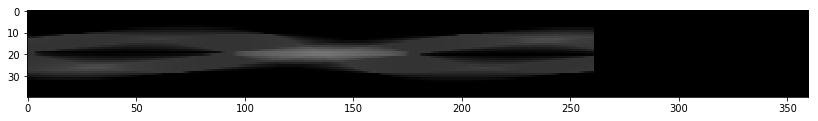

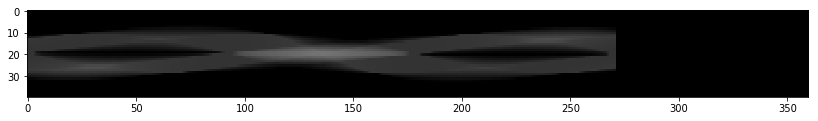

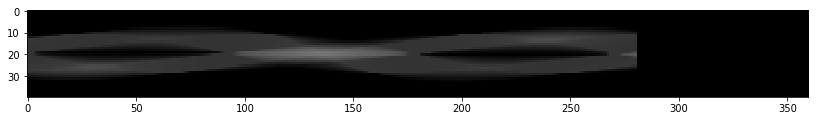

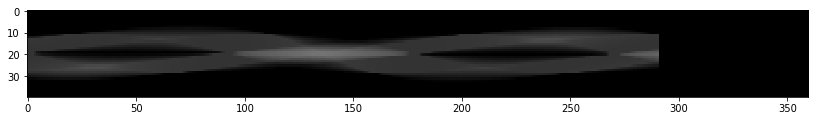

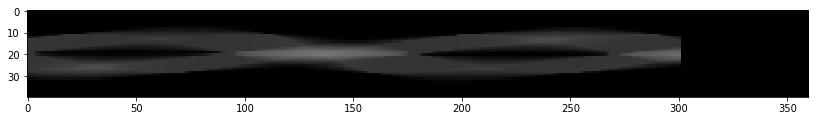

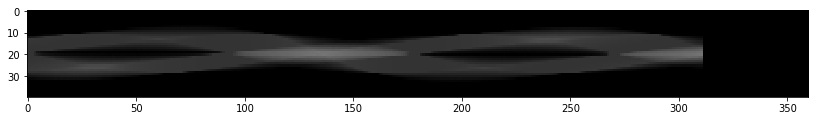

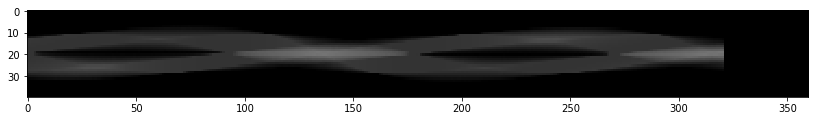

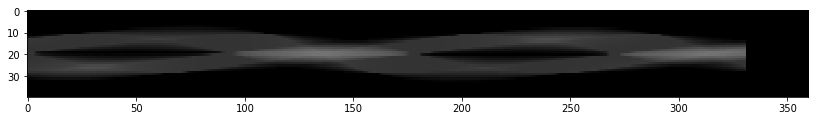

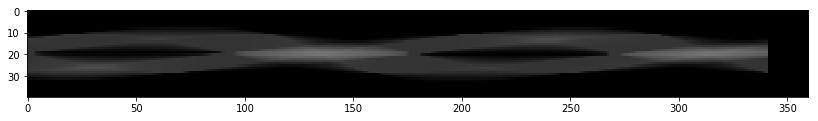

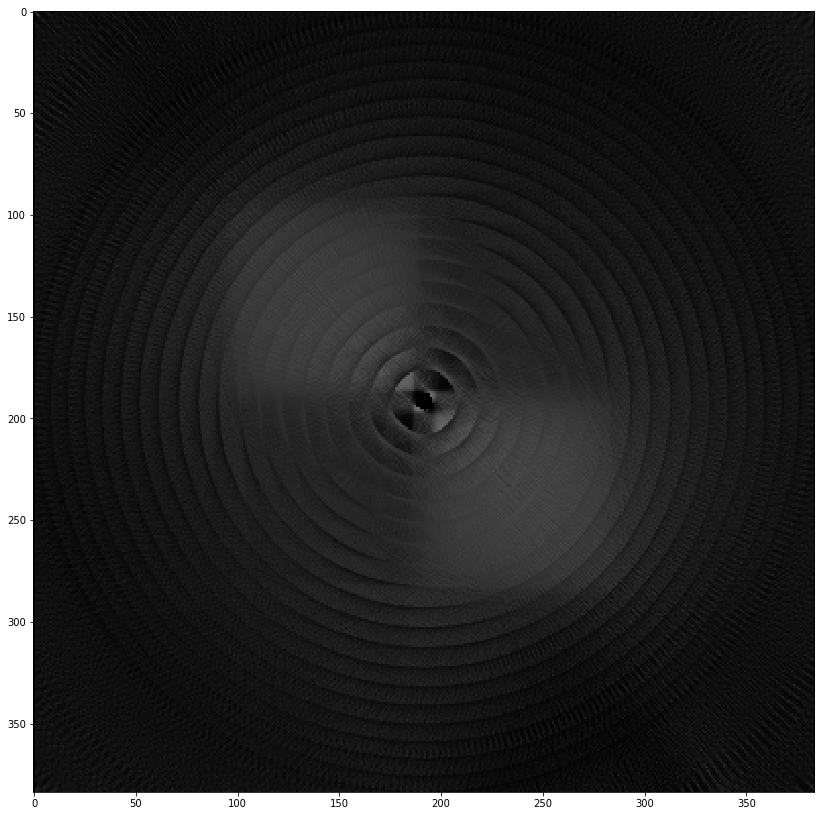

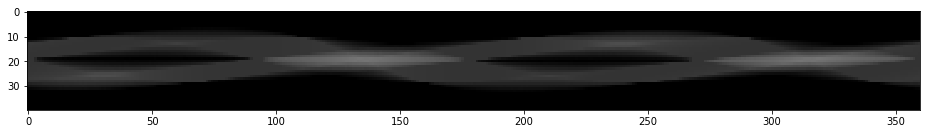

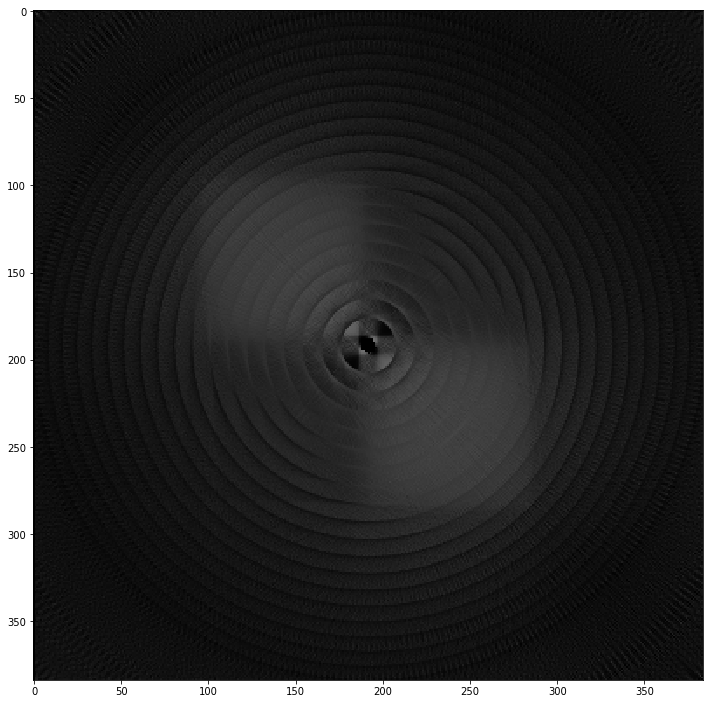

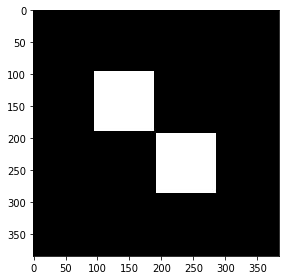

In [6]:
import numpy as np
%matplotlib inline
#import matplotlib.pyplot as plt

obraz = wczytajObraz("tomograf-zdjecia/Kwadraty2.jpg")

r = np.sqrt(obraz.shape[0]**2 + obraz.shape[1]**2)/2


##### PARAMETRY #####
alfa = 0 * (np.pi / 180)
Alfa1 = alfa
deltaAlfa = 1
liczbaDetektorow = 40
ileIteracji = int(360 / deltaAlfa)
rozpietosc = 180 * (np.pi / 180)
#stworz sinogram
sinogram = np.zeros([liczbaDetektorow,ileIteracji,3],dtype=np.int64)
sinogram.fill(0)

for k in range(ileIteracji):
    #if(k % 60==0): 
    #    print('Tworze sinogram z obrazu - iteracja: ',k,'/',ileIteracji)
    alfa = (Alfa1 + k*deltaAlfa) * np.pi / 180
    
    emiter = np.array([r*np.cos(alfa),r*np.sin(alfa)])
    
    emiter[0] = emiter[0] + obraz.shape[0]/2
    emiter[1] = obraz.shape[1]/2-emiter[1]
    
    detektory = np.array([[0 for i in range(2)] for j in range(liczbaDetektorow)])

    detektory[0,0] = r * np.cos(alfa + np.pi-rozpietosc/2)
    detektory[0,1] = r * np.sin(alfa + np.pi-rozpietosc/2)
    detektory[0,0] = detektory[0,0] + obraz.shape[0]/2
    detektory[0,1] = obraz.shape[1]/2-detektory[0,1] 

    for i in range(1,liczbaDetektorow):
        detektory[i,0] = r * np.cos(alfa + np.pi-rozpietosc/2 + i*rozpietosc/(liczbaDetektorow-1))
        detektory[i,1] = r * np.sin(alfa + np.pi-rozpietosc/2 + i*rozpietosc/(liczbaDetektorow-1))

        detektory[i,0] = detektory[i,0] + obraz.shape[0]/2
        detektory[i,1] = obraz.shape[1]/2-detektory[i,1]  


    wszystkieLinieX = []
    wszystkieLinieY = []
    for i in range(liczbaDetektorow):
        liniaX,liniaY = bresenhamS(int(emiter[0]),int(emiter[1]),int(detektory[i,0]),int(detektory[i,1]))
        
        wszystkieLinieX.append(liniaX)
        wszystkieLinieY.append(liniaY)

    srednia = []
    for i in range(len(wszystkieLinieX)):
        suma=np.array([0,0,0])
        liczbaElementowWsrodku=0
        for j in range(len(wszystkieLinieX[i])):
            if (wszystkieLinieX[i][j] < obraz.shape[0]) and (wszystkieLinieY[i][j] < obraz.shape[1]):
                suma += obraz[wszystkieLinieX[i][j],wszystkieLinieY[i][j]]
                liczbaElementowWsrodku += 1
        if liczbaElementowWsrodku > 0:
            suma[0] /= liczbaElementowWsrodku
            suma[1] /= liczbaElementowWsrodku
            suma[2] /= liczbaElementowWsrodku
        srednia.append(suma)
    
    for i in range(liczbaDetektorow):
        sinogram[i,k] += srednia[i]
    
    if k % 10 == 0:
        plt.figure(figsize=(14,18))
        plt.imshow(sinogram, interpolation='nearest') #interpolation='none'
        #plt.show();
        display.clear_output(wait=True)
        display.display(pl.gcf())
        #time.sleep(4.0)


#plt.yticks(np.arange(0,50,step=0.5), fontsize=9)
#plt.figure(figsize=(16,20))
#plt.imshow(sinogram, interpolation='nearest') #interpolation='none'
#plt.show()

## PARAMETRY DO ODTWORZENIA OBRAZU Z SINOGRAMU (te same) ##
alfa = 0 * (np.pi / 180)
Alfa1 = alfa
#deltaAlfa = 1
#liczbaDetektorow = 50
#ileIteracji = int(360 / deltaAlfa)
#rozpietosc = 90 * (np.pi / 180)

ileRazyLiczony = np.zeros((obraz.shape[0],obraz.shape[1]))

wartosciDanychPikseli = np.zeros((obraz.shape[0],obraz.shape[1]))
wartosciDanychPikseli.fill(0)

obrazZSinogramu = np.zeros([obraz.shape[0],obraz.shape[1],3],dtype=np.int64)
obrazZSinogramu.fill(0)
for k in range(ileIteracji):
    #if(k % 60==0): 
    #    print('Tworze obraz z sinogramu - iteracja: ',k,'/',ileIteracji)
    alfa = (Alfa1 + k*deltaAlfa) * np.pi / 180
    
    emiter = np.array([r*np.cos(alfa),r*np.sin(alfa)])
    
    emiter[0] = emiter[0] + obraz.shape[0]/2
    emiter[1] = obraz.shape[1]/2-emiter[1]
    
    detektory = np.array([[0 for i in range(2)] for j in range(liczbaDetektorow)])

    detektory[0,0] = r * np.cos(alfa + np.pi-rozpietosc/2)
    detektory[0,1] = r * np.sin(alfa + np.pi-rozpietosc/2)
    detektory[0,0] = detektory[0,0] + obraz.shape[0]/2
    detektory[0,1] = obraz.shape[1]/2-detektory[0,1] 

    for i in range(1,liczbaDetektorow):
        detektory[i,0] = r * np.cos(alfa + np.pi-rozpietosc/2 + i*rozpietosc/(liczbaDetektorow-1))
        detektory[i,1] = r * np.sin(alfa + np.pi-rozpietosc/2 + i*rozpietosc/(liczbaDetektorow-1))

        detektory[i,0] = detektory[i,0] + obraz.shape[0]/2
        detektory[i,1] = obraz.shape[1]/2-detektory[i,1]  


    wszystkieLinieX = []
    wszystkieLinieY = []
    for i in range(liczbaDetektorow):
        liniaX,liniaY = bresenhamS(int(emiter[0]),int(emiter[1]),int(detektory[i,0]),int(detektory[i,1]))
        
        wszystkieLinieX.append(liniaX)
        wszystkieLinieY.append(liniaY)

    
    for i in range(len(wszystkieLinieX)):
        for j in range(len(wszystkieLinieX[i])):
            if (wszystkieLinieX[i][j] < obraz.shape[0]) and (wszystkieLinieY[i][j] < obraz.shape[1]) and (wszystkieLinieX[i][j]>=0) and (wszystkieLinieY[i][j]>0):
                wartosciDanychPikseli[wszystkieLinieX[i][j],wszystkieLinieY[i][j]] += sinogram[i,k,0]
                ileRazyLiczony[wszystkieLinieX[i][j],wszystkieLinieY[i][j]] += 1
            
    
    for i in range(obraz.shape[0]):
        for j in range(obraz.shape[1]):
            if(ileRazyLiczony[i,j] > 0):
                #wartosciDanychPikseli[i,j] /= ileRazyLiczony[i,j]
                obrazZSinogramu[i,j,0] = wartosciDanychPikseli[i,j] / ileRazyLiczony[i,j]
                obrazZSinogramu[i,j,1] = wartosciDanychPikseli[i,j] / ileRazyLiczony[i,j]
                obrazZSinogramu[i,j,2] = wartosciDanychPikseli[i,j] / ileRazyLiczony[i,j]
    
    if k % 36 == 0:
        #plt.figure(figsize=(10,14))
        plt.imshow(obrazZSinogramu, interpolation='nearest') #interpolation='none'
        #plt.show();
        display.clear_output(wait=True)
        display.display(pl.gcf())
        #time.sleep(4.0)

plt.figure(figsize=(16,20))
plt.imshow(sinogram, interpolation='nearest') #interpolation='none'
plt.show()
plt.figure(figsize=(12,16))
plt.imshow(obrazZSinogramu, interpolation='nearest')
plt.show()
io.imshow(obraz)

sinogram.shape =  (180, 360, 3)
iteracja:  0 / 360
alfa =  0.0  stopni
iteracja:  60 / 360
alfa =  59.0  stopni
iteracja:  120 / 360
alfa =  119.0  stopni
iteracja:  180 / 360
alfa =  179.0  stopni
iteracja:  240 / 360
alfa =  238.99999999999997  stopni
iteracja:  300 / 360
alfa =  298.99999999999994  stopni


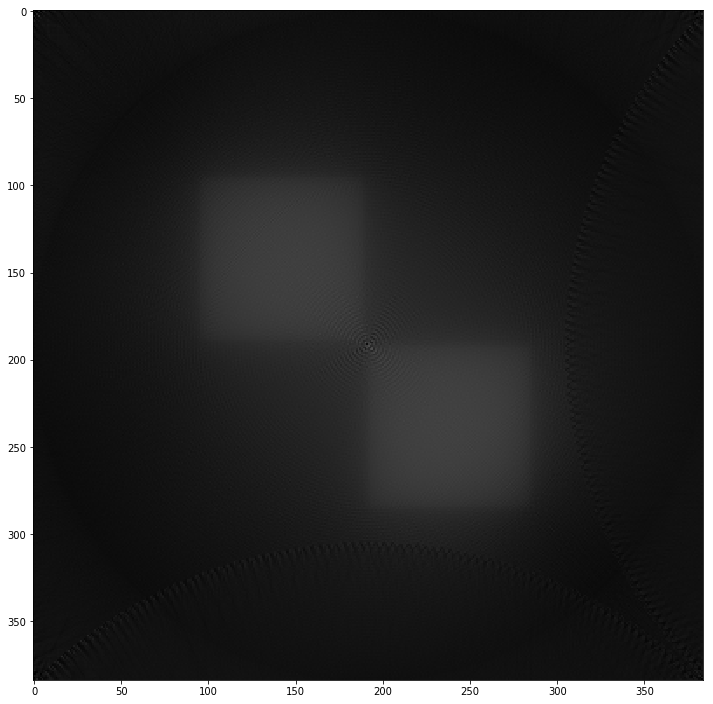